In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from wordcloud import WordCloud

# Import raw data

In [2]:
df = pd.read_csv("../data_acquisition/kununu_data.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)

# Let's take a quick look at the first rows
df.head()

,Employer,Time,Comment,Overall,Interessante Aufgaben,Gleichberechtigung,Kommunikation,Arbeitsbedingungen,Vorgesetztenverhalten,Umgang mit älteren Kollegen,...,Variation,Spaßfaktor,Aufgaben/Tätigkeiten,Die Ausbilder,Ausbildungsvergütung,Arbeitszeiten,Karrierechancen,Arbeitgeber-Kommentar,Herausforderung,Arbeitgeber-Kommentare
0,adidas,Mai 2022,adidas AG - Manager Level,Nicht empfohlen,4.0,4.0,4.0,4.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,adidas,Mai 2022,Großer Konzern mit konservativen und veraltete...,Nicht empfohlen,1.0,2.0,1.0,3.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,adidas,Mai 2022,Super Campus aber intern politisch,Nicht empfohlen,4.0,1.0,2.0,3.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,adidas,April 2022,"Große Marke, hohe Erwartungen",Empfohlen,5.0,5.0,4.0,4.0,4.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,adidas,April 2022,außen hui innen pfui,Nicht empfohlen,3.0,2.0,2.0,4.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Basic data cleaning

In [3]:
# Show columns

df.columns

Index(['Employer', 'Time', 'Comment', 'Overall', 'Interessante Aufgaben',
       'Gleichberechtigung', 'Kommunikation', 'Arbeitsbedingungen',
       'Vorgesetztenverhalten', 'Umgang mit älteren Kollegen',
       'Kollegenzusammenhalt', 'Umwelt-/Sozialbewusstsein',
       'Gehalt/Sozialleistungen', 'Karriere/Weiterbildung',
       'Work-Life-Balance', 'Image', 'Arbeitsatmosphäre', 'Respekt',
       'Variation', 'Spaßfaktor', 'Aufgaben/Tätigkeiten', 'Die Ausbilder',
       'Ausbildungsvergütung', 'Arbeitszeiten', 'Karrierechancen',
       'Arbeitgeber-Kommentar', 'Herausforderung', 'Arbeitgeber-Kommentare'],
      dtype='object')

In [4]:
# Rename columns and translate to english

df = df.rename(columns={
    'Employer': "employer",
    'Time': "record_date",
    'Comment': "comment",
    'Overall': "overall_result",
    'Interessante Aufgaben': 'interesting_tasks', 
    'Gleichberechtigung': 'equality',
    'Kommunikation': "communication",
    'Arbeitsbedingungen': "working_conditions",
    'Vorgesetztenverhalten': "supervisor_behavior",
    'Umgang mit älteren Kollegen': "dealing_w_older_colleagues",
    'Kollegenzusammenhalt': "colleague_cohesion",
    'Umwelt-/Sozialbewusstsein': "environmental_social awareness",
    'Gehalt/Sozialleistungen': "salary_benefits",
    'Karriere/Weiterbildung': "career_training",
    'Work-Life-Balance': "work_life_balance",
    'Image': "image",
    'Arbeitsatmosphäre': "work_atmosphere",
    'Respekt': "respect",
    'Variation': "variation",
    'Spaßfaktor': "fun_factor",
    'Aufgaben/Tätigkeiten': "tasks",
    'Die Ausbilder': "trainer",
    'Ausbildungsvergütung': "apprenticeship_pay",
    'Arbeitszeiten': "working_hours",
    'Karrierechancen': "career_opportunities",
    'Arbeitgeber-Kommentar': "employer_comment",
    'Herausforderung': "challenge",
    'Arbeitgeber-Kommentare': "employer_comments"   
})

In [5]:
# Most of the columns are numeric, that's fine for now

df.dtypes

employer                           object
record_date                        object
comment                            object
overall_result                     object
interesting_tasks                 float64
equality                          float64
communication                     float64
working_conditions                float64
supervisor_behavior               float64
dealing_w_older_colleagues        float64
colleague_cohesion                float64
environmental_social awareness    float64
salary_benefits                   float64
career_training                   float64
work_life_balance                 float64
image                             float64
work_atmosphere                   float64
respect                           float64
variation                         float64
fun_factor                        float64
tasks                             float64
trainer                           float64
apprenticeship_pay                float64
working_hours                     

In [6]:
# Quite a few columns have a lot of missing values. 

df.isna().sum()

employer                             0
record_date                          0
comment                              0
overall_result                       0
interesting_tasks                  166
equality                           201
communication                      147
working_conditions                 169
supervisor_behavior                145
dealing_w_older_colleagues         265
colleague_cohesion                 143
environmental_social awareness     250
salary_benefits                    189
career_training                    207
work_life_balance                  203
image                              228
work_atmosphere                    679
respect                           3050
variation                         3051
fun_factor                        3050
tasks                             3050
trainer                           3056
apprenticeship_pay                3053
working_hours                     3056
career_opportunities              3063
employer_comment         

In [7]:
# Let's get rid of everything above 500 and see how many rows are left

df.drop(["work_atmosphere", 
         "respect", 
         "variation", 
         "fun_factor", 
         "tasks", 
         "trainer", 
         "apprenticeship_pay", 
         "working_hours",
         "career_opportunities",
         "employer_comment",
         "challenge",
         "employer_comments"
        ], axis=1, inplace=True)

df = df.reset_index(drop=True)

df.shape

(3174, 16)

Empfohlen          0.664461
Nicht empfohlen    0.335539
Name: overall_result, dtype: float64


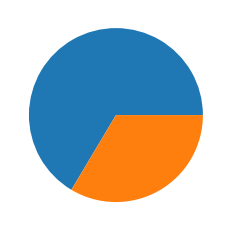

In [8]:
# The dataset (binary target variable) is inbalanced. 
# For a ML-modell (binary classification) this might have to be considered

targ = df.overall_result.value_counts(normalize=True)
print(targ)
plt.pie(x=targ)
plt.show()

In [9]:
# Let's translate the target column and check again for absolute value counts

df.overall_result.replace("Nicht empfohlen", "not_recommended", inplace=True)
df.overall_result.replace("Empfohlen", "recommended", inplace=True)

df.overall_result.value_counts()

recommended        2109
not_recommended    1065
Name: overall_result, dtype: int64

In [10]:
#Save DataFrame as .csv file

df.to_csv("../data/kununu_cleaned_data.csv")

# Quick EDA

In [11]:
# Although we see numbers, these are ordinal categorical variables! 
# Users have rated each feature between 1 and 5 stars

df.describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["std"], color='#F8766D')\
                     .bar(subset=["count",], color='#00BFC4')

,count,mean,std,min,25%,50%,75%,max
supervisor_behavior,3029.000000,3.480687,1.493504,1.000000,2.000000,4.000000,5.000000,5.000000
career_training,2967.000000,3.368049,1.431051,1.000000,2.000000,4.000000,5.000000,5.000000
communication,3027.000000,3.390486,1.391415,1.000000,2.000000,4.000000,5.000000,5.000000
equality,2973.000000,3.744366,1.378761,1.000000,3.000000,4.000000,5.000000,5.000000
work_life_balance,2971.000000,3.610569,1.360881,1.000000,3.000000,4.000000,5.000000,5.000000
interesting_tasks,3008.000000,3.750332,1.360214,1.000000,3.000000,4.000000,5.000000,5.000000
working_conditions,3005.000000,3.677205,1.359840,1.000000,3.000000,4.000000,5.000000,5.000000
image,2946.000000,3.694162,1.343720,1.000000,3.000000,4.000000,5.000000,5.000000
salary_benefits,2985.000000,3.624456,1.326419,1.000000,3.000000,4.000000,5.000000,5.000000
environmental_social awareness,2924.000000,3.677155,1.320803,1.000000,3.000000,4.000000,5.000000,5.000000


In [12]:
# Although rating each employer is not the goal here, it is still interesting to see...
# Change parameter from 50 to None to see all rows


pd.set_option('display.max_rows', 50)
df.groupby("employer").overall_result.value_counts(normalize=True)

employer    overall_result 
adidas      recommended        0.700000
            not_recommended    0.300000
airbus      recommended        0.644444
            not_recommended    0.355556
allianz118  recommended        0.545455
                                 ...   
volkswagen  not_recommended    0.211111
vonovia-se  not_recommended    0.511111
            recommended        0.488889
zalando     not_recommended    0.533333
            recommended        0.466667
Name: overall_result, Length: 77, dtype: float64

In [13]:
# We need to be careful, as not all employers have enough representative data here...

df.groupby("employer").overall_result.count()

employer
adidas                          90
airbus                          90
allianz118                      11
basf-se                         90
bayer                           90
bmwgroup                        90
brenntag                        90
continental-gruppe              90
covestro-deutschland3           90
daimler-truck3                  61
delivery-hero                   63
deutsche-bank                   90
deutsche-boerse                 90
deutsche-post                   90
deutsche-telekom                90
eon                             90
fresenius-medical-care          90
fresenius-se                    53
hannover-rueckversicherung      71
heidelberg-zement                1
hellofresh                      72
henkel-aa                       90
infineon-technologies           90
linde                           90
mercedes-benz-group             90
merckaa                         90
mtuaeroengines                  90
muenchener-rueckversicherung    57
porsche-gru

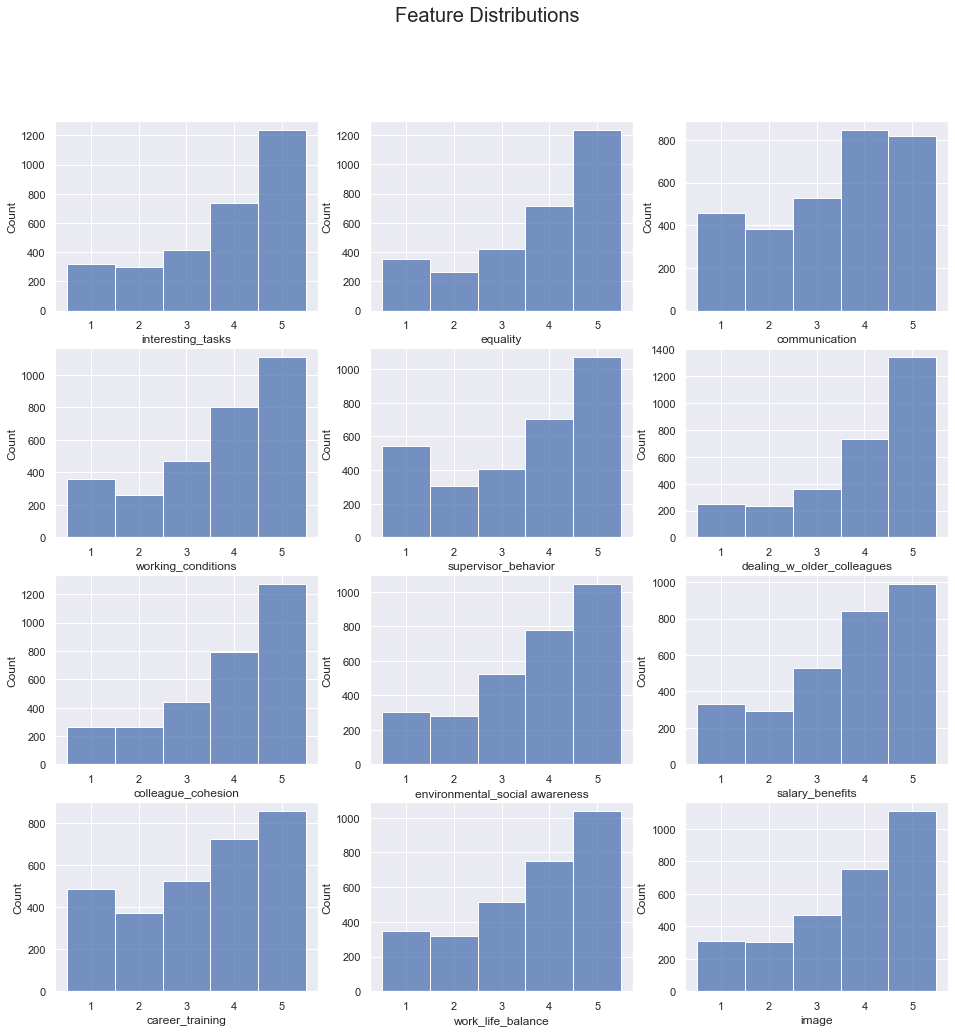

In [14]:
# Let's take a look at the distributions... 

# All features are asymmetrical / left-skewed (negative skew -> thicker left tail and mode>median>mean)
# People tend to give higher scores for each feature. Can that really be the case?
# In almost all cases the score 2 is the least frequent score. Why is that?

numerical_columns = df.select_dtypes("number").columns

sns.set(style="darkgrid")

plt.figure(figsize=(16, 16))
for i, f in enumerate(numerical_columns):
    plt.subplot(4,3,i+1)
    sns.histplot(data=df[f], bins=5, discrete=True)
plt.suptitle("Feature Distributions", fontsize=20)
plt.show() 
plt.close()

dealing_w_older_colleagues       -1.026147
colleague_cohesion               -0.906761
equality                         -0.814909
interesting_tasks                -0.802789
working_conditions               -0.755313
image                            -0.733568
environmental_social awareness   -0.720129
salary_benefits                  -0.684297
work_life_balance                -0.639729
supervisor_behavior              -0.541460
communication                    -0.453607
career_training                  -0.408521
dtype: float64


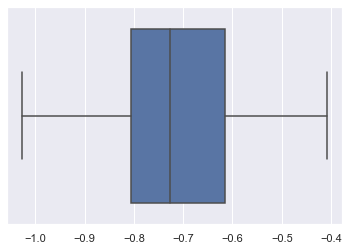

In [15]:
# Calculating the skewness...

print(df[numerical_columns].skew().sort_values())
sns.set(style="darkgrid")
sns.boxplot(x=df[numerical_columns].skew())
plt.show() 
plt.close()

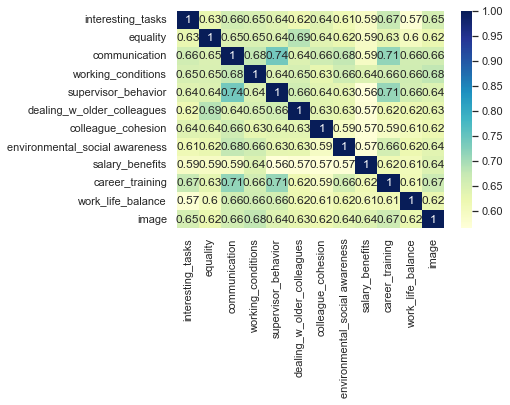

In [16]:
# ...and the correlations of the features

# There is a high positive correlation between all features
# That could be a problem for ML-Models...need to try I guess

_ = sns.heatmap(df[numerical_columns].corr(), annot=True, cmap="YlGnBu")

In [17]:
# Found this stopword list. Let's create a simple wordcloud for "fun" from the comments column

# Source and more Information: https://solariz.de/de/downloads/6/german-enhanced-stopwords.htm

stop_bag = """ab
aber
alle
allein
allem
allen
aller
allerdings
allerlei
alles
allmählich
allzu
als
alsbald
also
am
an
and
ander
andere
anderem
anderen
anderer
andererseits
anderes
anderm
andern
andernfalls
anders
anstatt
auch
auf
aus
ausgenommen
ausser
ausserdem
außer
außerdem
außerhalb
arbeitgeber
arbeitnehmer
bald
bei
beide
beiden
beiderlei
beides
beim
beinahe
bereits
besonders
besser
beträchtlich
bevor
bezüglich
bin
bis
bisher
bislang
bist
bloß
bsp.
bzw
ca
ca.
content
da
dabei
dadurch
dafür
dagegen
daher
dahin
damals
damit
danach
daneben
dann
daran
darauf
daraus
darin
darum
darunter
darüber
darüberhinaus
das
dass
dasselbe
davon
davor
dazu
daß
dein
deine
deinem
deinen
deiner
deines
dem
demnach
demselben
den
denen
denn
dennoch
denselben
der
derart
derartig
derem
deren
derer
derjenige
derjenigen
derselbe
derselben
derzeit
des
deshalb
desselben
dessen
desto
deswegen
dich
die
diejenige
dies
diese
dieselbe
dieselben
diesem
diesen
dieser
dieses
diesseits
dir
direkt
direkte
direkten
direkter
doch
dort
dorther
dorthin
drauf
drin
drunter
drüber
du
dunklen
durch
durchaus
eben
ebenfalls
ebenso
eher
eigenen
eigenes
eigentlich
ein
eine
einem
einen
einer
einerseits
eines
einfach
einführen
einführte
einführten
eingesetzt
einig
einige
einigem
einigen
einiger
einigermaßen
einiges
einmal
eins
einseitig
einseitige
einseitigen
einseitiger
einst
einstmals
einzig
entsprechend
entweder
er
erst
es
etc
etliche
etwa
etwas
euch
euer
eure
eurem
euren
eurer
eures
falls
fast
ferner
folgende
folgenden
folgender
folgendes
folglich
fuer
für
gab
ganze
ganzem
ganzen
ganzer
ganzes
gar
gegen
gemäss
ggf
gleich
gleichwohl
gleichzeitig
glücklicherweise
gänzlich
hab
habe
haben
haette
hast
hat
hatte
hatten
hattest
hattet
heraus
herein
hier
hier
hinter
hiermit
hiesige
hin
hinein
hinten
hinter
hinterher
http
hätt
hätte
hätten
höchstens
ich
igitt
ihm
ihn
ihnen
ihr
ihre
ihrem
ihren
ihrer
ihres
im
immer
immerhin
in
indem
indessen
infolge
innen
innerhalb
ins
insofern
inzwischen
irgend
irgendeine
irgendwas
irgendwen
irgendwer
irgendwie
irgendwo
ist
ja
je
jed
jede
jedem
jeden
jedenfalls
jeder
jederlei
jedes
jedoch
jemand
jene
jenem
jenen
jener
jenes
jenseits
jetzt
jährig
jährige
jährigen
jähriges
kam
kann
kannst
kaum
kein
keine
keinem
keinen
keiner
keinerlei
keines
keineswegs
klar
klare
klaren
klares
klein
kleinen
kleiner
kleines
koennen
koennt
koennte
koennten
komme
kommen
kommt
konkret
konkrete
konkreten
konkreter
konkretes
können
könnt
künftig
leider
machen
man
manche
manchem
manchen
mancher
mancherorts
manches
manchmal
mehr
mehrere
mein
meine
meinem
meinen
meiner
meines
mich
mir
mit
mithin
muessen
muesst
muesste
muss
musst
musste
mussten
muß
mußt
müssen
müsste
müssten
müßt
müßte
nach
nachdem
nachher
nachhinein
nahm
natürlich
neben
nebenan
nehmen
nein
nicht
nichts
nie
niemals
niemand
nirgends
nirgendwo
noch
nun
nur
nächste
nämlich
nötigenfalls
ob
oben
oberhalb
obgleich
obschon
obwohl
oder
oft
per
plötzlich
schließlich
schon
sehr
sehrwohl
seid
sein
seine
seinem
seinen
seiner
seines
seit
seitdem
seither
selber
selbst
sich
sicher
sicherlich
sie
sind
so
sobald
sodass
sodaß
soeben
sofern
sofort
sogar
solange
solch
solche
solchem
solchen
solcher
solches
soll
sollen
sollst
sollt
sollte
sollten
solltest
somit
sondern
sonst
sonstwo
sooft
soviel
soweit
sowie
sowohl
tatsächlich
tatsächlichen
tatsächlicher
tatsächliches
trotzdem
ueber
um
umso
unbedingt
und
unmöglich
unmögliche
unmöglichen
unmöglicher
uns
unser
unser
unsere
unsere
unserem
unseren
unserer
unseres
unter
unternehmen
usw
viel
viele
vielen
vieler
vieles
vielleicht
vielmals
vom
von
vor
voran
vorher
vorüber
völlig
wann
war
waren
warst
warum
was
weder
weil
weiter
weitere
weiterem
weiteren
weiterer
weiteres
weiterhin
weiß
welche
welchem
welchen
welcher
welches
wem
wen
wenig
wenige
weniger
wenigstens
wenn
wenngleich
wer
werde
werden
werdet
weshalb
wessen
wichtig
wie
wieder
wieso
wieviel
wiewohl
will
willst
wir
wird
wirklich
wirst
wo
wodurch
wogegen
woher
wohin
wohingegen
wohl
wohlweislich
womit
woraufhin
woraus
worin
wurde
wurden
während
währenddessen
wär
wäre
wären
würde
würden
z.B.
zB
zahlreich
zeitweise
zu
zudem
zuerst
zufolge
zugleich
zuletzt
zum
zumal
zur
zurück
zusammen
zuviel
zwar
zwischen
ähnlich
übel
über
überall
überallhin
überdies
übermorgen
übrig
übrigens"""

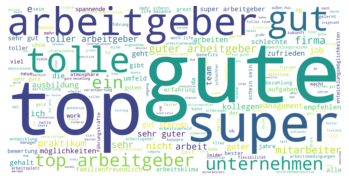

In [18]:
# That looks quite positive...(did not translate to english, as this column will not be included the model)
# But remember: The dataset is unbalanced wrt the overall result

stop_words = stop_bag.split("\n")
word_list = ",".join(df.comment.to_list())
word_list = word_list.lower().split(" ")
comments_cleaned = [word for word in word_list if word not in stop_words]
comments_cleaned = ",".join(comments_cleaned)

wordcloud = WordCloud(width=2000, height=1000, margin=0, background_color='white').generate(comments_cleaned)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [19]:
# A simple and quick way to get an overview is the pandas Profile Report

profile = ProfileReport(df, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]